# Ethereum Price Prediction

Based on [Ethereum (ETH) Price Prediction using Machine Learning (SVR) & Python](https://www.youtube.com/watch?v=HiDEAWdAif0) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

Load the Bitcoin data

In [3]:
df = pd.read_csv("ETH.csv")

Set the date as index

In [4]:
df = df.set_index(pd.DatetimeIndex(df['Date']))

Show the data

In [5]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-01-01,2021-01-01,737.708374,749.201843,719.792236,730.367554,13652004358,0,0
2021-01-02,2021-01-02,730.402649,786.798462,718.109497,774.534973,19740771179,0,0
2021-01-03,2021-01-03,774.511841,1006.565002,771.561646,975.507690,45200463368,0,0
2021-01-04,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,56945985763,0,0
2021-01-05,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,41535932781,0,0
...,...,...,...,...,...,...,...,...
2021-05-09,2021-05-09,3911.463135,3981.259033,3743.989014,3928.844727,50568290278,0,0
2021-05-10,2021-05-10,3924.413330,4197.473145,3684.451660,3952.293945,62691789007,0,0
2021-05-11,2021-05-11,3948.271973,4178.208984,3783.889404,4168.701172,52679737865,0,0


In [6]:
future_days = 5

Create a new column

In [7]:
df[str(future_days)+"_Day_Price_Forecast"] = df[['Close']].shift(-future_days)

Show the data

In [8]:
df[['Close', str(future_days)+"_Day_Price_Forecast"]]

,Close,5_Day_Price_Forecast
Date,,
2021-01-01,730.367554,1207.112183
2021-01-02,774.534973,1225.678101
2021-01-03,975.507690,1224.197144
2021-01-04,1040.233032,1281.077271
2021-01-05,1100.006104,1262.246704
...,...,...
2021-05-09,3928.844727,NaN
2021-05-10,3952.293945,NaN
2021-05-11,4168.701172,NaN


In [9]:
X = np.array(df[['Close']])

In [10]:
X = X[:df.shape[0] - future_days]

In [11]:
X

array([[ 730.36755371],
       [ 774.53497314],
       [ 975.50769043],
       [1040.23303223],
       [1100.00610352],
       [1207.11218262],
       [1225.67810059],
       [1224.19714355],
       [1281.07727051],
       [1262.2467041 ],
       [1090.14538574],
       [1043.43457031],
       [1130.73937988],
       [1218.45300293],
       [1171.83459473],
       [1233.53759766],
       [1230.17224121],
       [1257.27954102],
       [1377.29589844],
       [1382.27404785],
       [1121.57092285],
       [1236.51220703],
       [1230.99060059],
       [1391.609375  ],
       [1324.41479492],
       [1357.05810547],
       [1253.18713379],
       [1298.10180664],
       [1382.52282715],
       [1376.11547852],
       [1314.98620605],
       [1369.04052734],
       [1515.19372559],
       [1660.9095459 ],
       [1594.76269531],
       [1718.65087891],
       [1677.84680176],
       [1614.2277832 ],
       [1746.61682129],
       [1768.03503418],
       [1744.2434082 ],
       [1783.797

In [12]:
y = np.array(df[str(future_days)+"_Day_Price_Forecast"])

In [13]:
y = y[:-future_days]

In [14]:
y

array([1207.11218262, 1225.67810059, 1224.19714355, 1281.07727051,
       1262.2467041 , 1090.14538574, 1043.43457031, 1130.73937988,
       1218.45300293, 1171.83459473, 1233.53759766, 1230.17224121,
       1257.27954102, 1377.29589844, 1382.27404785, 1121.57092285,
       1236.51220703, 1230.99060059, 1391.609375  , 1324.41479492,
       1357.05810547, 1253.18713379, 1298.10180664, 1382.52282715,
       1376.11547852, 1314.98620605, 1369.04052734, 1515.19372559,
       1660.9095459 , 1594.76269531, 1718.65087891, 1677.84680176,
       1614.2277832 , 1746.61682129, 1768.03503418, 1744.2434082 ,
       1783.79797363, 1843.53259277, 1814.10986328, 1805.08410645,
       1779.79101562, 1781.06750488, 1848.45825195, 1937.44921875,
       1960.16479492, 1919.53405762, 1935.60107422, 1781.99291992,
       1570.20397949, 1626.57568359, 1475.70373535, 1446.03369141,
       1459.97314453, 1416.0489502 , 1564.7076416 , 1492.60876465,
       1575.85314941, 1541.91430664, 1533.27502441, 1654.74157

Split the data

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
from sklearn.svm import SVR

In [18]:
params = {
    "C": [1e3, 1e4, 1e5, 1e6, 1e7],
    "kernel": ['rbf'],
    "gamma": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7],
}

In [19]:
grid_search_svr = GridSearchCV(
    SVR(), params
)

In [20]:
grid_search_svr.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000.0, 10000.0, 100000.0, 1000000.0,
                               10000000.0],
                         'gamma': [0.001, 0.0001, 1e-05, 1e-06, 1e-07],
                         'kernel': ['rbf']})

In [21]:
print("best_score: ", grid_search_svr.best_score_)

best_score:  0.9055738244077423


In [22]:
print("best_params: ", grid_search_svr.best_params_)

best_params:  {'C': 100000.0, 'gamma': 1e-06, 'kernel': 'rbf'}


In [23]:
svr_rbf = grid_search_svr.best_estimator_

In [24]:
svr_rbf.fit(x_train, y_train)

SVR(C=100000.0, gamma=1e-06)

In [25]:
svr_rbf_confidendce = svr_rbf.score(x_test, y_test)

In [26]:
svr_rbf_confidendce

0.886173102274263

In [27]:
svm_predicition = svr_rbf.predict(x_test)

In [28]:
svm_predicition

array([3724.07868051, 2966.06022833, 1571.95524335, 1543.66986485,
       1727.79323636, 3449.30042898, 3959.32044616, 1769.91283959,
       1467.8184965 , 1938.67348197, 2232.88523425, 2776.55174991,
       1238.620476  , 1880.1887442 , 2481.1010424 , 1940.40661654,
       1814.53261413, 1651.52948777, 2036.87363443, 2577.18460138,
       3956.55409625, 1193.45953548, 1656.15279512, 3273.7213873 ,
       2620.16973332, 2311.6379183 ])

In [29]:
print(y)

[1207.11218262 1225.67810059 1224.19714355 1281.07727051 1262.2467041
 1090.14538574 1043.43457031 1130.73937988 1218.45300293 1171.83459473
 1233.53759766 1230.17224121 1257.27954102 1377.29589844 1382.27404785
 1121.57092285 1236.51220703 1230.99060059 1391.609375   1324.41479492
 1357.05810547 1253.18713379 1298.10180664 1382.52282715 1376.11547852
 1314.98620605 1369.04052734 1515.19372559 1660.9095459  1594.76269531
 1718.65087891 1677.84680176 1614.2277832  1746.61682129 1768.03503418
 1744.2434082  1783.79797363 1843.53259277 1814.10986328 1805.08410645
 1779.79101562 1781.06750488 1848.45825195 1937.44921875 1960.16479492
 1919.53405762 1935.60107422 1781.99291992 1570.20397949 1626.57568359
 1475.70373535 1446.03369141 1459.97314453 1416.0489502  1564.7076416
 1492.60876465 1575.85314941 1541.91430664 1533.27502441 1654.74157715
 1723.15380859 1834.72790527 1868.04882812 1799.16625977 1826.19494629
 1772.10241699 1924.6854248  1854.56433105 1791.70227051 1806.97180176
 1823.44

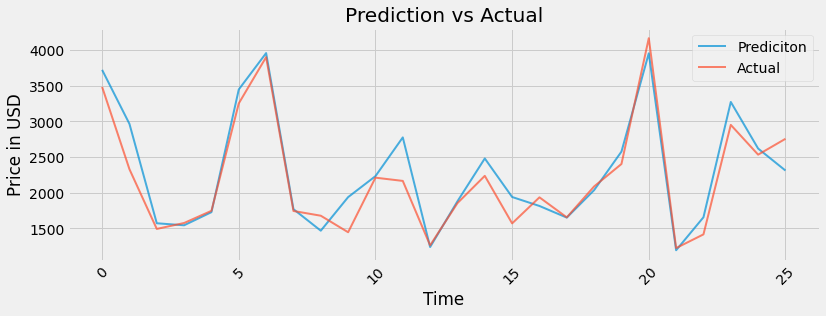

In [30]:
plt.figure(figsize=(12,4))
plt.plot(svm_predicition, label="Prediciton", lw=2, alpha=0.7)
plt.plot(y_test, label="Actual", lw=2, alpha=0.7)
plt.title("Prediction vs Actual")
plt.ylabel("Price in USD")
plt.xlabel("Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

**THIS IS NOT AN INVESTMENT ADVICE!**